In [1]:
import geohash
import pandas as pd
import numpy as np
import random
import math
import operator
from sklearn.linear_model import LinearRegression
from hv import HyperVolume
import matplotlib.pyplot as plt
%matplotlib inline

from init import init
from eva import eva
from nond import nond
from ope import ope
from tour import tour
from rep import rep
from score import score
from linear import linear
#读取距离矩阵
dis = pd.read_csv('C:/Users/sjw/Desktop/paper/data/dis.csv',header=None,low_memory=False).values.tolist()

#生成初始停车顺序，V用户，gen代数，pop种群大小，M目标函数数量，
V = len(dis)
M = 2
gen = 50
pop = 30
#初始化与排序
chro,train = init(pop,V,dis)
chro = nond(chro,M,V)
#选择参数
#tour_size = 2
#pour_size = round(pop/2)
chro_lr = [[],[],[]]

scoreP = []
scoreN = []

In [2]:
for g in range(gen):
    #选择交叉
    #chro = tour(chro,pour_size,tour_size)
    ope(chro,M,V,dis,train)
    #回归变异
    gentic = linear(train,745)
    gentic2 = linear(train,746)
    gentic3 = linear(train,747)
    
    sup = eva(gentic,V,dis)
    sup2 = eva(gentic2,V,dis)
    sup3 = eva(gentic3,V,dis)
    #变异个体集合
    chro_lr[0].append(gentic)
    chro_lr[1].append(gentic2)
    chro_lr[2].append(gentic3)
    
    chro = nond(chro,M,V)
    #继承淘汰
    chro = rep(chro,M,V,pop)

In [3]:
#加变异
for i in range(len(chro_lr[0])):
    chro.append(chro_lr[0][i])
    #合并
    chro = nond(chro,M,V)
    chro = rep(chro,M,V,pop)
    scoreP.append(score(chro))

In [4]:
for i in range(len(chro_lr[0])):
    chro.append(chro_lr[1][i])
    chro.append(chro_lr[2][i])
    #合并
    chro = nond(chro,M,V)
    chro = rep(chro,M,V,pop)
    scoreN.append(score(chro))

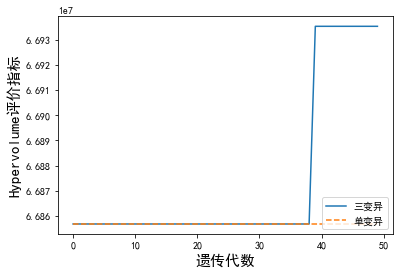

In [5]:
x = []

for i in range(gen):
    x.append(i)

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#设置X轴标签  
plt.xlabel('遗传代数',fontsize=15)  
#设置Y轴标签  
plt.ylabel('Hypervolume评价指标',fontsize=15)

plt.plot(x,scoreN,linestyle="-", label="三变异")
plt.plot(x,scoreP,'--',linestyle="--", label="单变异")
plt.legend(loc='lower right')